# Predicting Unknown Values (Notebook 4 of 4) 

In [259]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [260]:
# Prerequistites

!pip install scikit-learn xgboost

In [261]:
# Importing the data
data = pd.read_csv('../2_cleaned_data/d_merged_with_labels.csv')
data

,osm_id,ncc_owned,osm_way_id,house_area,house_peri,house_vert,private,house_lati,NATIONALCA,land_area,land_perim,land_verti,land_longi,land_latit,COUNT,house_long,b2lpercent,building_age
0,35551462,1,35551462,66,34,8,yes,6.971754e+06,29324493.0,207.0,62.0,12.0,-128367.6972,6.971752e+06,1,-128372.04,32.0,NaN
1,43078229,0,43078229,70,34,4,no,6.972089e+06,29416618.0,1261.0,151.0,36.0,-127157.2719,6.972083e+06,1,-127167.64,6.0,NaN
2,43078229,0,43078229,70,34,4,no,6.972089e+06,29416618.0,1261.0,151.0,36.0,-127157.2719,6.972083e+06,1,-127167.64,6.0,NaN
3,43078229,0,43078229,70,34,4,no,6.972089e+06,29416618.0,1261.0,151.0,36.0,-127157.2719,6.972083e+06,1,-127167.64,6.0,NaN
4,43078229,0,43078229,70,34,4,no,6.972089e+06,29416618.0,1261.0,151.0,36.0,-127157.2719,6.972083e+06,1,-127167.64,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1161677257,0,1161677257,57,31,4,no,6.972118e+06,29473181.0,249.0,68.0,11.0,-126524.4317,6.972113e+06,2,-126511.29,23.0,NaN
3422,1161677257,0,1161677257,57,31,4,no,6.972118e+06,29473181.0,249.0,68.0,11.0,-126524.4317,6.972113e+06,2,-126511.29,23.0,NaN
3423,1161677258,0,1161677258,52,30,4,no,6.972130e+06,61944023.0,160.0,71.0,11.0,-126531.5937,6.972125e+06,2,-126523.83,33.0,NaN
3424,1161677259,0,1161677259,50,30,4,no,6.972136e+06,61940774.0,161.0,72.0,9.0,-126538.1983,6.972131e+06,2,-126529.85,31.0,NaN


### Selecting data where 'building_age' is labelled

In [262]:
index=~data['building_age'].isna()

#Get index

labelled_data = data[index]

labelled_data

,osm_id,ncc_owned,osm_way_id,house_area,house_peri,house_vert,private,house_lati,NATIONALCA,land_area,land_perim,land_verti,land_longi,land_latit,COUNT,house_long,b2lpercent,building_age
37,61738758,0,61738758,61,38,8,no,6.971471e+06,29393419.0,69.0,41.0,12.0,-127468.5196,6.971467e+06,2,-127469.97,88.0,modern
88,61738934,0,61738934,53,31,8,no,6.971390e+06,29403117.0,127.0,50.0,12.0,-127334.2561,6.971393e+06,2,-127334.47,42.0,modern
89,61738936,0,61738936,83,39,4,no,6.971303e+06,29399689.0,282.0,78.0,25.0,-127391.7110,6.971309e+06,2,-127392.91,29.0,modern
97,61738958,0,61738958,40,32,6,no,6.972130e+06,29374681.0,102.0,60.0,14.0,-127724.8765,6.972138e+06,2,-127723.61,39.0,victorian
103,61738962,0,61738962,49,36,6,no,6.971576e+06,29370838.0,164.0,56.0,10.0,-127794.9319,6.971576e+06,1,-127789.88,30.0,victorian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,815821956,1,815821956,43,27,4,yes,6.972389e+06,60841217.0,189.0,69.0,17.0,-127254.7223,6.972392e+06,4,-127256.05,23.0,21st_century
3364,815821957,1,815821957,38,25,4,yes,6.972367e+06,60266631.0,126.0,58.0,14.0,-127237.5003,6.972368e+06,5,-127237.20,30.0,21st_century
3416,866781899,1,866781899,50,30,6,yes,6.972128e+06,61301033.0,133.0,55.0,17.0,-127108.9538,6.972127e+06,5,-127106.98,38.0,21st_century
3417,866781900,1,866781900,49,29,7,yes,6.972120e+06,61301008.0,137.0,51.0,12.0,-127100.5090,6.972118e+06,5,-127099.87,36.0,21st_century


# Data Preparation

In [263]:
# encoding building_age
encoder = LabelEncoder()
labelled_data['building_age_encoded'] = encoder.fit_transform(labelled_data['building_age'])

/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_20076/175375518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['building_age_encoded'] = encoder.fit_transform(labelled_data['building_age'])


In [264]:
features = ['land_area', 'ncc_owned', 'land_perim', 'land_verti', 'land_longi', 'land_latit', 'house_area', 'house_peri',
            'house_vert', 'house_long', 'house_lati', 'b2lpercent']

X = labelled_data[features]
y = labelled_data['building_age_encoded']  # Use the encoded column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the classifiers

In [265]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

lr_predictions = lr_classifier.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_error = 1 - lr_accuracy

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression Error: {lr_error:.4f}")

Logistic Regression Accuracy: 0.2167
Logistic Regression Error: 0.7833


In [266]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC())
]
stack_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_classifier.fit(X_train, y_train)

stack_predictions = stack_classifier.predict(X_test)

stack_accuracy = accuracy_score(y_test, stack_predictions)
stack_error = 1 - stack_accuracy

print(f"Stacked Generalization Accuracy: {stack_accuracy:.4f}")
print(f"Stacked Generalization Error: {stack_error:.4f}")

Stacked Generalization Accuracy: 0.9167
Stacked Generalization Error: 0.0833


/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [267]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_error = 1 - dt_accuracy

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Error: {dt_error:.4f}")

Decision Tree Accuracy: 0.8167
Decision Tree Error: 0.1833


In [268]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_error = 1 - rf_accuracy

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Error: {rf_error:.4f}")

Random Forest Accuracy: 0.9667
Random Forest Error: 0.0333


In [269]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

xgb_predictions = xgb_classifier.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_error = 1 - xgb_accuracy

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Error: {xgb_error:.4f}")

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:41:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy: 0.9833
XGBoost Error: 0.0167


# Predict unknown values

In [273]:
# view table

unknown

,land_area,ncc_owned,land_perim,land_verti,land_longi,land_latit,house_area,house_peri,house_vert,house_long,house_lati,b2lpercent,predicted_buiding_age
0,207.0,1,62.0,12.0,-128367.6972,6.971752e+06,66,34,8,-128372.04,6.971754e+06,32.0,victorian
1,1261.0,0,151.0,36.0,-127157.2719,6.972083e+06,70,34,4,-127167.64,6.972089e+06,6.0,inter_war
2,1261.0,0,151.0,36.0,-127157.2719,6.972083e+06,70,34,4,-127167.64,6.972089e+06,6.0,inter_war
3,1261.0,0,151.0,36.0,-127157.2719,6.972083e+06,70,34,4,-127167.64,6.972089e+06,6.0,inter_war
4,1261.0,0,151.0,36.0,-127157.2719,6.972083e+06,70,34,4,-127167.64,6.972089e+06,6.0,inter_war
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,249.0,0,68.0,11.0,-126524.4317,6.972113e+06,57,31,4,-126511.29,6.972118e+06,23.0,victorian
3422,249.0,0,68.0,11.0,-126524.4317,6.972113e+06,57,31,4,-126511.29,6.972118e+06,23.0,victorian
3423,160.0,0,71.0,11.0,-126531.5937,6.972125e+06,52,30,4,-126523.83,6.972130e+06,33.0,victorian
3424,161.0,0,72.0,9.0,-126538.1983,6.972131e+06,50,30,4,-126529.85,6.972136e+06,31.0,victorian


In [270]:
## predict all unknown data
unknown = data[features]
prediction_num = rf_classifier.predict(unknown)
unknown['predicted_buiding_age'] = encoder.inverse_transform(prediction_num)

/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_20076/544349665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown['predicted_buiding_age'] = encoder.inverse_transform(prediction_num)


In [272]:
# Updating the table for export to felt.com mapping

# creating a copy
unknown_copy = unknown.copy()

#Rename columns
unknown_copy.rename(columns={'ncc_owned': 'Council Owned'}, inplace=True)
unknown_copy.rename(columns={'land_area': 'Land Area(sqm)'}, inplace=True)
unknown_copy.rename(columns={'land_perim': 'Land Perimeter(m)'}, inplace=True)
unknown_copy.rename(columns={'land_verti': 'Land No. of Corners'}, inplace=True)
unknown_copy.rename(columns={'land_longi': 'Land Longitude'}, inplace=True)
unknown_copy.rename(columns={'land_latit': 'Land Latitude'}, inplace=True)
unknown_copy.rename(columns={'house_area': 'House Area(sqm)'}, inplace=True)
unknown_copy.rename(columns={'house_peri': 'House Perimeter(m)'}, inplace=True)
unknown_copy.rename(columns={'house_vert': 'House No. of Corners'}, inplace=True)
unknown_copy.rename(columns={'house_long': 'Longitude'}, inplace=True)
unknown_copy.rename(columns={'house_lati': 'Latitude'}, inplace=True)
unknown_copy.rename(columns={'b2lpercent': 'Building to Land Ratio (%)'}, inplace=True)
unknown_copy.rename(columns={'predicted_buiding_age': 'Predicted Building Age'}, inplace=True)

#Rename values in Council Owned Column to yes / no
unknown_copy.rename(columns={'ncc_owned': 'Council Owned'}, inplace=True)
unknown_copy['Council Owned'] = unknown_copy['Council Owned'].map({1: 'Yes', 0: 'No'})

#Round percentage to a whole number
unknown_copy['Building to Land Ratio (%)'] = unknown_copy['Building to Land Ratio (%)'].round().astype(int)

#Remove columns
new_unknown = unknown_copy.drop(columns=['Land No. of Corners', 'Land Latitude','Land Longitude','House No. of Corners','House No. of Corners',])

#Re-order columns
reordered_columns = ['Council Owned', 'Predicted Building Age', 'Building to Land Ratio (%)','House Area(sqm)','House Perimeter(m)','Land Area(sqm)','Land Perimeter(m)','Longitude','Latitude']
new_unknown = new_unknown[reordered_columns]


In [274]:
print(new_unknown.columns)

Index(['Council Owned', 'Predicted Building Age', 'Building to Land Ratio (%)',
       'House Area(sqm)', 'House Perimeter(m)', 'Land Area(sqm)',
       'Land Perimeter(m)', 'Longitude', 'Latitude'],
      dtype='object')


In [275]:
new_unknown

,Council Owned,Predicted Building Age,Building to Land Ratio (%),House Area(sqm),House Perimeter(m),Land Area(sqm),Land Perimeter(m),Longitude,Latitude
0,Yes,victorian,32,66,34,207.0,62.0,-128372.04,6.971754e+06
1,No,inter_war,6,70,34,1261.0,151.0,-127167.64,6.972089e+06
2,No,inter_war,6,70,34,1261.0,151.0,-127167.64,6.972089e+06
3,No,inter_war,6,70,34,1261.0,151.0,-127167.64,6.972089e+06
4,No,inter_war,6,70,34,1261.0,151.0,-127167.64,6.972089e+06
...,...,...,...,...,...,...,...,...,...
3421,No,victorian,23,57,31,249.0,68.0,-126511.29,6.972118e+06
3422,No,victorian,23,57,31,249.0,68.0,-126511.29,6.972118e+06
3423,No,victorian,33,52,30,160.0,71.0,-126523.83,6.972130e+06
3424,No,victorian,31,50,30,161.0,72.0,-126529.85,6.972136e+06


In [276]:
# export as .csv

new_unknown.to_csv('../5_predictions/meadows_with_predictions.csv', index=None)

# Visualisations of classifiers

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/luketaylor/anaconda3/envs/uf-ml/l

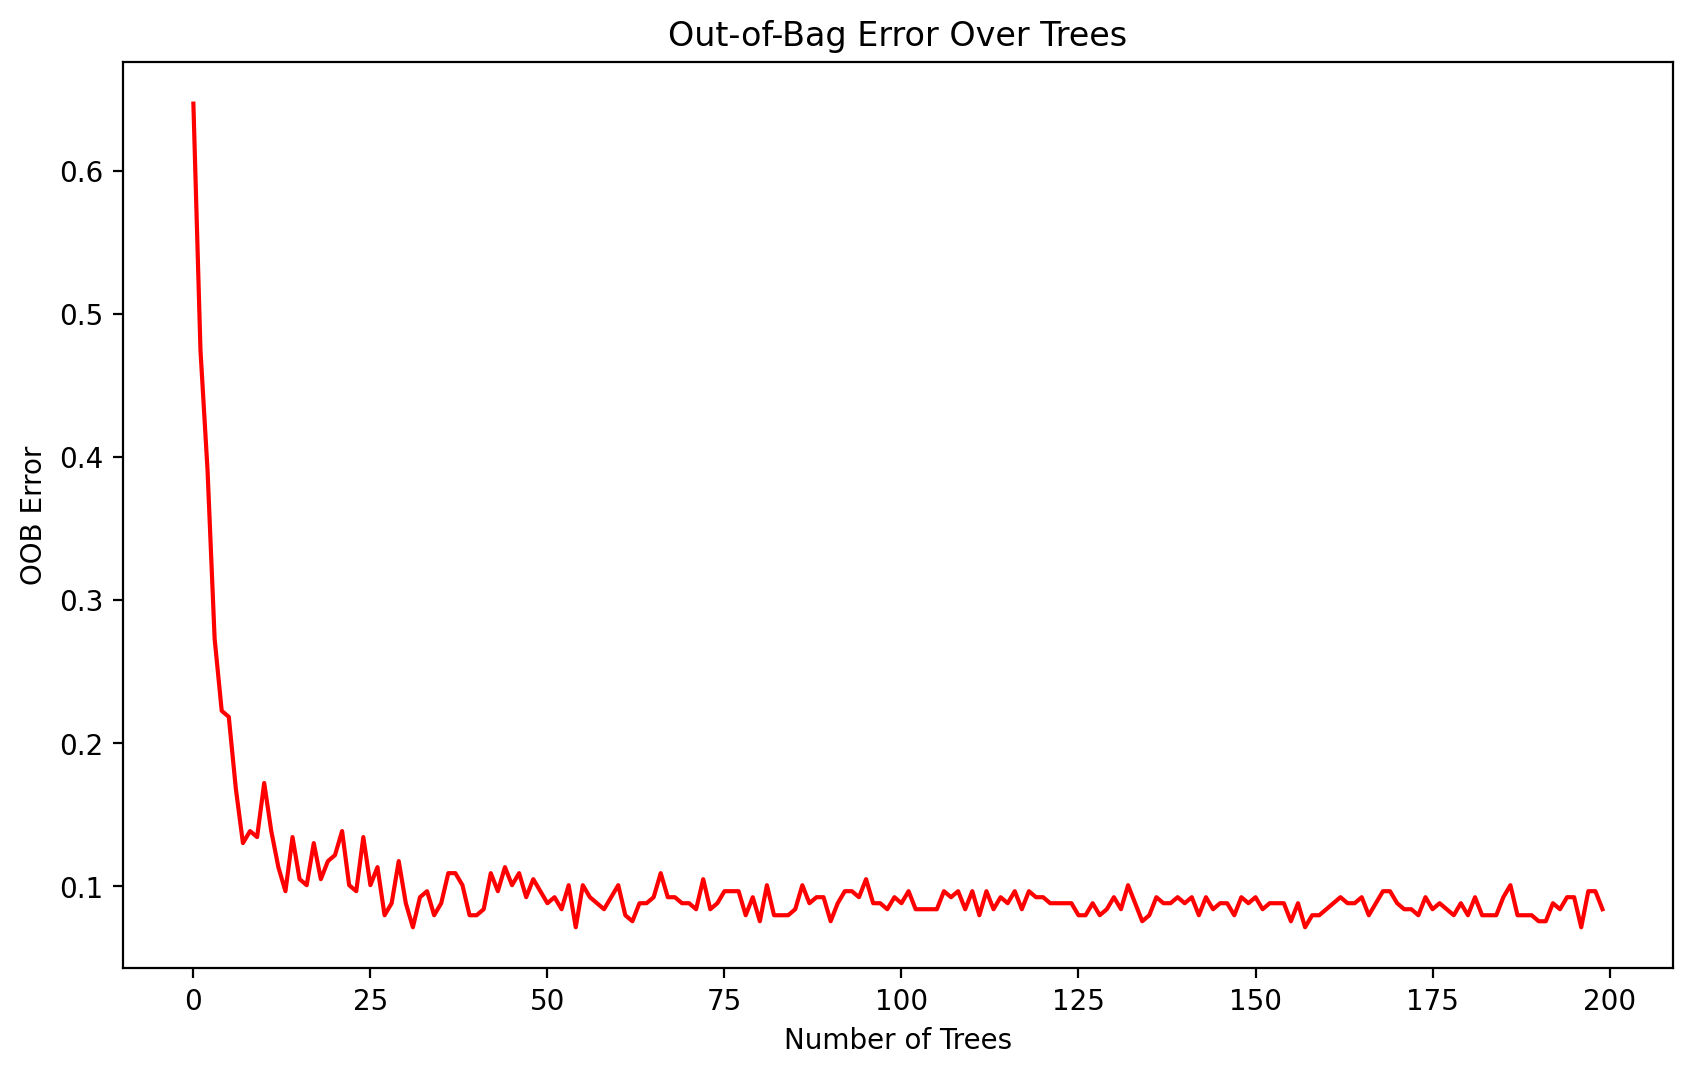

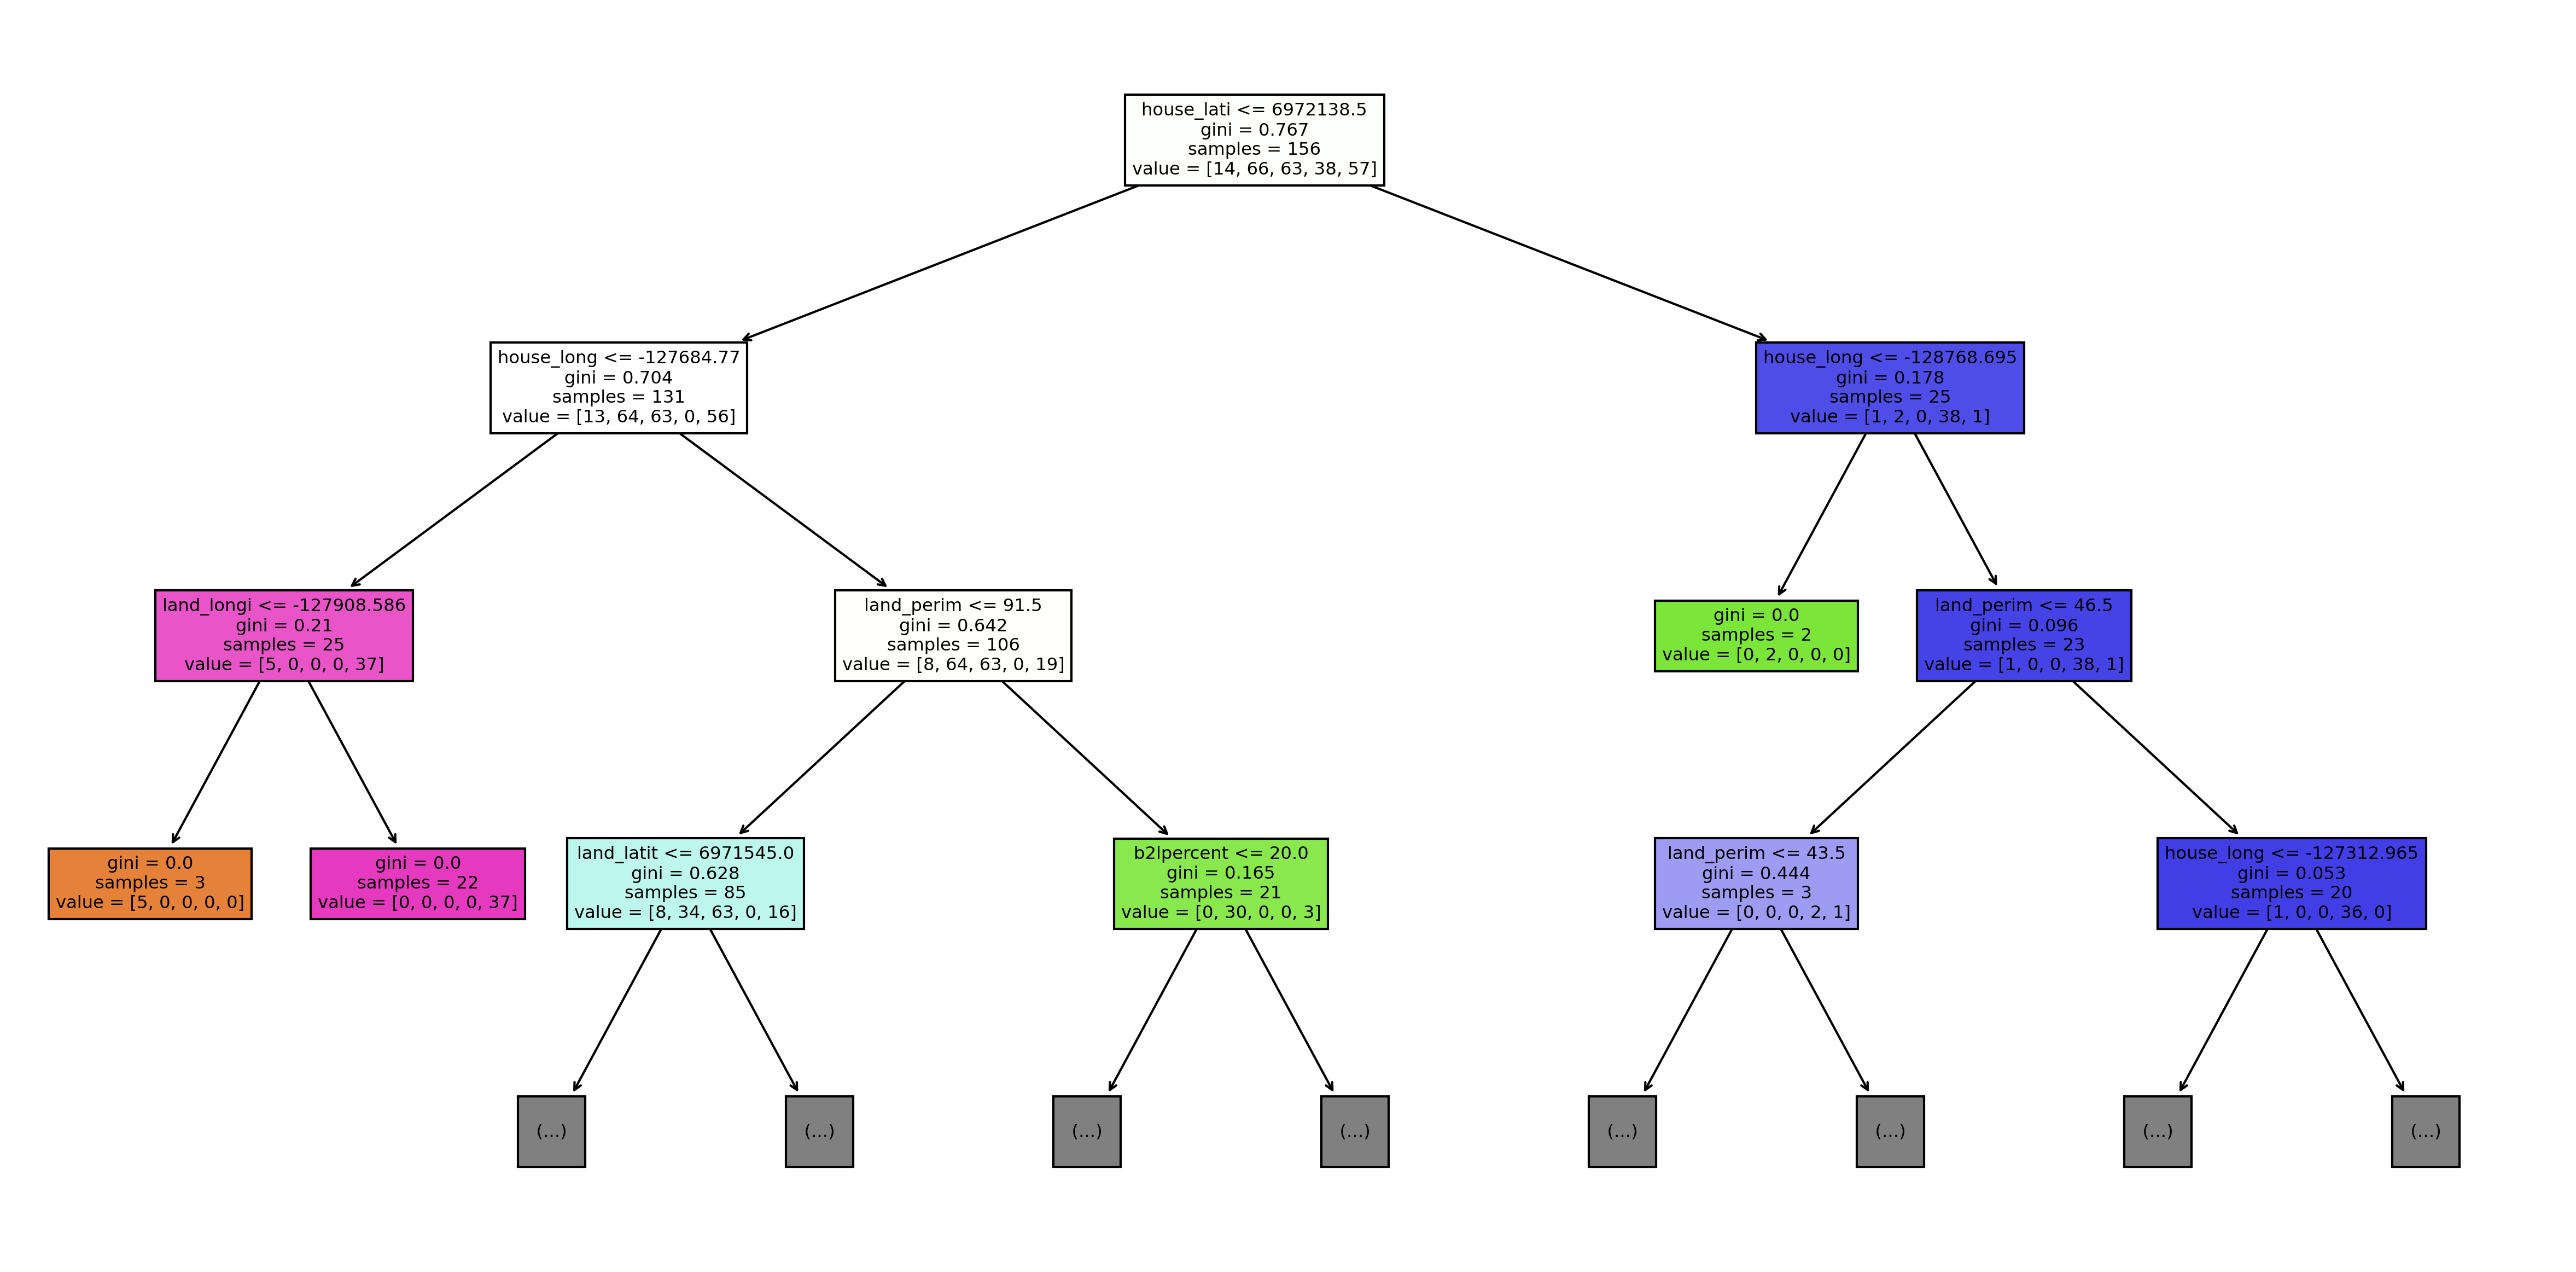

In [292]:
### Visualising random forest output

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# convergence

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize a Random Forest with out-of-bag samples enabled
rf_classifier = RandomForestClassifier(oob_score=True, n_estimators=100)
errors = []

# Fit the model and collect OOB errors after adding each tree
for i in range(1, 201):  # Assuming 100 trees in the forest
    rf_classifier.set_params(n_estimators=i)
    rf_classifier.fit(X_train, y_train)
    oob_error = 1 - rf_classifier.oob_score_
    errors.append(oob_error)

# Plot the OOB error
plt.figure(figsize=(10, 6),dpi=200)
plt.plot(errors, '-r')
plt.title('Out-of-Bag Error Over Trees')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.show()

# To visualize an individual tree
chosen_tree = rf_classifier.estimators_[0]  # Pick the first tree as an example
plt.figure(figsize=(20, 10),dpi=300)
plot_tree(chosen_tree, filled=True, feature_names=X_train.columns, max_depth=3)
plt.show()

In [278]:
# Initialize and train your Random Forest
rf_classifier = RandomForestClassifier(oob_score=True, n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Choose an individual tree. For example, the first tree.
chosen_tree = rf_classifier.estimators_[0]

# Plot the entire tree. This might produce a very large and dense plot.
plt.figure(figsize=(20, 20), dpi=600)  # You might need to adjust the figure size to fit the tree.
plot_tree(chosen_tree, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)

# view in high resolution
plt.savefig('tree_visualization.png', dpi=600)  # saves with a higher resolution
plt.show()

# Comparison of all models

In [279]:
# Train Models and Collect Metrics:

def get_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    avg_f1 = f1_score(y_true, y_pred, average='macro')

    return precision, recall, f1, accuracy, avg_f1


In [280]:
# Define, train models, and collect metrics:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Stacking Classifier": StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())], final_estimator=LogisticRegression()),
    "XGBoost": xgb.XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    precision, recall, f1, accuracy, avg_f1 = get_metrics(y_test, predictions)

    results.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy,
        'Avg F1-score': avg_f1
    })


/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[13:42:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [281]:
# Display Results:
df_results = pd.DataFrame(results)
df_results

,Model,Precision,Recall,F1-score,Accuracy,Avg F1-score
0,Logistic Regression,0.046944,0.216667,0.077169,0.216667,0.071233
1,Random Forest,0.968899,0.966667,0.966627,0.966667,0.971326
2,Stacking Classifier,0.886032,0.866667,0.871979,0.866667,0.832562
3,XGBoost,0.984375,0.983333,0.983294,0.983333,0.986141
4,Decision Tree,0.845960,0.783333,0.798632,0.783333,0.761172


In [282]:
# convert to latex

print(df_results.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
              Model &  Precision &   Recall &  F1-score &  Accuracy &  Avg F1-score \\
\midrule
Logistic Regression &   0.046944 & 0.216667 &  0.077169 &  0.216667 &      0.071233 \\
      Random Forest &   0.968899 & 0.966667 &  0.966627 &  0.966667 &      0.971326 \\
Stacking Classifier &   0.886032 & 0.866667 &  0.871979 &  0.866667 &      0.832562 \\
            XGBoost &   0.984375 & 0.983333 &  0.983294 &  0.983333 &      0.986141 \\
      Decision Tree &   0.845960 & 0.783333 &  0.798632 &  0.783333 &      0.761172 \\
\bottomrule
\end{tabular}



/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_20076/3969524685.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_results.to_latex(index=False))


In [283]:
# Confusion matrix

# Imports:

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


In [284]:
# Define and Train Models:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Stacking Classifier": StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())], final_estimator=LogisticRegression()),
    "XGBoost": xgb.XGBClassifier(eval_metric='merror'),
    "Decision Tree": DecisionTreeClassifier()
}

confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    confusion_matrices[name] = cm

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [285]:
model_names = ["Logistic Regression", "Random Forest", "Stacking Classifier", "XGBoost", "Decision Tree"]

models = [
    LogisticRegression(max_iter=1000), 
    RandomForestClassifier(), 
    StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())], final_estimator=LogisticRegression()), 
    xgb.XGBClassifier(), 
    DecisionTreeClassifier()
]

In [286]:
# more visual table

data_for_table = []

for name, matrix in confusion_matrices.items():
    flat_matrix = matrix.flatten()
    row_data = {"Model": name}
    for i, value in enumerate(flat_matrix):
        row_data[f"Value_{i+1}"] = value
    data_for_table.append(row_data)

In [287]:
df_cm = pd.DataFrame(data_for_table)
df_cm

,Model,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,...,Value_16,Value_17,Value_18,Value_19,Value_20,Value_21,Value_22,Value_23,Value_24,Value_25
0,Logistic Regression,0,4,0,0,0,0,13,0,0,...,0,15,0,0,0,0,14,0,0,0
1,Random Forest,4,0,0,0,0,0,13,0,0,...,0,0,0,15,0,0,1,0,0,13
2,Stacking Classifier,4,0,0,0,0,0,13,0,0,...,0,0,0,15,0,0,1,0,0,13
3,XGBoost,4,0,0,0,0,0,13,0,0,...,0,0,0,15,0,0,0,0,0,14
4,Decision Tree,4,0,0,0,0,2,10,1,0,...,2,0,0,13,0,0,3,0,0,11


In [288]:
# rows for each model

data_for_table = []

for name, matrix in confusion_matrices.items():
    flat_matrix = matrix.flatten()
    row_data = {
        "Model": name,
        "True_Negative": flat_matrix[0],
        "False_Positive": flat_matrix[1],
        "False_Negative": flat_matrix[2],
        "True_Positive": flat_matrix[3]
    }
    data_for_table.append(row_data)

In [289]:
# Create DataFrame:
df_cm = pd.DataFrame(data_for_table)
df_cm

,Model,True_Negative,False_Positive,False_Negative,True_Positive
0,Logistic Regression,0,4,0,0
1,Random Forest,4,0,0,0
2,Stacking Classifier,4,0,0,0
3,XGBoost,4,0,0,0
4,Decision Tree,4,0,0,0


In [290]:
# convergence error graph

params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': 5
}

evals = [(dtrain, 'train'), (dtest, 'test')]
evals_result = {}

xgb_model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, evals_result=evals_result, verbose_eval=False)

# Extract and plot
train_errors = evals_result['train']['mlogloss']
test_errors = evals_result['test']['mlogloss']

plt.plot(train_errors, label='Train')
plt.plot(test_errors, label='Test')
plt.xlabel('Iterations')
plt.ylabel('Multiclass LogLoss')
plt.title('XGBoost Convergence')
plt.legend()
plt.show()

NameError: name 'dtrain' is not defined

In [ ]:
# Comparing the performance of each model

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_results has been defined and populated as in previous examples
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy', 'Avg F1-score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=df_results, palette='viridis')
    plt.title(f'Comparative {metric} of Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Define metrics and models
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy', 'Avg F1-score']
models = df_results['Model'].tolist()

# Create an x-location for each model's bar
bar_width = 0.15
r = np.arange(len(models))

plt.figure(figsize=(15, 7))

# For each metric, create a bar for each model
for i, metric in enumerate(metrics):
    plt.bar(r + i*bar_width, df_results[metric], width=bar_width, edgecolor='white', label=metric)

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width*2 for r in range(len(models))], models, rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Assuming scores range from 0 to 1
plt.title('Comparative Performance of Models')

# Create legend & Show graphic
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
# Define metrics and models
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy', 'Avg F1-score']
models = df_results['Model'].tolist()

plt.figure(figsize=(15, 7))

# For each metric, plot a line for each model
for metric in metrics:
    plt.plot(models, df_results[metric], marker='o', label=metric)

plt.xlabel('Model', fontweight='bold')
plt.xticks(models, rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Assuming scores range from 0 to 1
plt.title('Comparative Performance of Models')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Create legend & Show graphic
plt.legend()
plt.show()